In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
# --- Load all price files
files = glob.glob("../../data/clean/stock_prices_clean/*.csv")
frames = []
for f in files:
    ticker = f.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(f, parse_dates=["date"])
    df["ticker"] = ticker.split("\\")[-1]
    frames.append(df)


In [3]:
frames[0]

date       open       high        low      close   volume  \
0    2018-01-03  19.562587  19.749111  19.547665  19.719267  5519259   
1    2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092   
2    2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594   
3    2018-01-08  20.099775  20.137079  19.920713  20.092314  5029780   
4    2018-01-09  19.972938  20.196766  19.935634  20.196766  6974533   
...         ...        ...        ...        ...        ...      ...   
1754 2024-12-19  48.924035  49.120203  47.747033  47.796074  3775494   
1755 2024-12-20  47.080066  48.070707  46.942749  47.923584  7180992   
1756 2024-12-23  47.923584  48.355150  47.786267  48.247257  1367512   
1757 2024-12-27  48.257069  48.669018  48.247259  48.590553  1420844   
1758 2024-12-30  48.374767  48.374767  47.796075  48.129559  1749120   

      adj close   ticker  
0     19.719267  ABBN.SW  
1     19.935635  ABBN.SW  
2     20.084852  ABBN.SW  
3     20.092314  ABBN.SW  
4     20.196766  ABBN.SW  
...         ...      ...  
1754  47.796074  ABBN.SW  
1755  47.923584  ABBN.SW  
1756  48.247257  ABBN.SW  
1757  48.590553  ABBN.SW  
1758  48.129559  ABBN.SW  

[1759 rows x 8 columns]

In [4]:
frames[1]

date       open       high        low      close      volume  \
0    2019-04-08  49.291523  49.291523  49.291523  49.291523         0.0   
1    2019-04-09  54.220677  57.937258  54.062944  57.227459  27102313.0   
2    2019-04-10  57.671084  57.710518  55.324806  56.823269   9612093.0   
3    2019-04-11  56.192335  56.428936  54.762880  55.206505   7584156.0   
4    2019-04-12  53.234844  54.358690  53.057394  53.234844   9887415.0   
...         ...        ...        ...        ...        ...         ...   
1438 2024-12-19  76.033153  76.571258  75.255875  75.495041    893459.0   
1439 2024-12-20  74.837347  75.813923  74.498540  75.754128   1977273.0   
1440 2024-12-23  75.594689  76.431747  75.116364  76.192589    511745.0   
1441 2024-12-27  76.611117  77.029654  76.252376  76.890144    412212.0   
1442 2024-12-30  76.770568  76.949938  76.013223  76.631058    535384.0   

      adj close  ticker  
0     49.291523  ALC.SW  
1     57.227459  ALC.SW  
2     56.823269  ALC.SW  
3     55.206505  ALC.SW  
4     53.234844  ALC.SW  
...         ...     ...  
1438  75.495041  ALC.SW  
1439  75.754128  ALC.SW  
1440  76.192589  ALC.SW  
1441  76.890144  ALC.SW  
1442  76.631058  ALC.SW  

[1443 rows x 8 columns]

In [5]:
market = pd.concat(frames)
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562587  19.749111  19.547665  19.719267  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099775  20.137079  19.920713  20.092314  5029780.0   
4 2018-01-09  19.972938  20.196766  19.935634  20.196766  6974533.0   

   adj close   ticker  
0  19.719267  ABBN.SW  
1  19.935635  ABBN.SW  
2  20.084852  ABBN.SW  
3  20.092314  ABBN.SW  
4  20.196766  ABBN.SW

In [6]:
market = market.sort_values(["ticker", "date"])


In [7]:
ticker_to_name = {
    "ABBN.SW": "ABB",
    "ALC.SW": "Alcon",
    "ALPN.SW": "Alpine",
    "ARYN.SW": "Aryzta",
    "BALN.SW": "Baloise",
    "BKW.SW": "BKW Energie",
    "BLKB.SW": "BLKB",
    "EMMN.SW": "Emmi",
    "GIVN.SW": "Givaudan",
    "HELN.SW": "Helvetia",
    "HOLN.SW": "Holcim",
    "BAER.SW": "Julius Baer",
    "LAND.SW": "Landis",
    "LOGN.SW": "Logitech",
    "LONN.SW": "Lonza",
    "NESN.SW": "Nestle",
    "NOVN.SW": "Novartis",
    "REHN.SW": "Reishauer",
    "CFR.SW": "Richemont",
    "ROG.SW": "Roche",
    "SANN.SW": "Santhera",
    "UHR.SW": "Swatch",
    "SPSN.SW": "Swiss Prime Site",
    "SCMN.SW": "Swisscom",
    "SLHN.SW": "Swiss Life",
    "SQN.SW": "Swissquote",
    "SREN.SW": "Swiss Re",
    "UBSG.SW": "UBS",
    "VONN.SW": "Vontobel",
    "ZURN.SW": "Zurich Insurance"
}


In [8]:
market["ticker"] = market["ticker"].replace(ticker_to_name)


## 1. Sanity-check the market data

In [9]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48936 entries, 0 to 1758
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       48936 non-null  datetime64[ns]
 1   open       48936 non-null  float64       
 2   high       48936 non-null  float64       
 3   low        48936 non-null  float64       
 4   close      48936 non-null  float64       
 5   volume     48936 non-null  float64       
 6   adj close  48936 non-null  float64       
 7   ticker     48936 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.4+ MB


In [10]:
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562587  19.749111  19.547665  19.719267  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099775  20.137079  19.920713  20.092314  5029780.0   
4 2018-01-09  19.972938  20.196766  19.935634  20.196766  6974533.0   

   adj close ticker  
0  19.719267    ABB  
1  19.935635    ABB  
2  20.084852    ABB  
3  20.092314    ABB  
4  20.196766    ABB

In [11]:
# basic QC
n_rows = len(market)
n_nulls = market.isna().sum()
dups = market.duplicated(subset=['ticker','date']).sum()
print(f"rows={n_rows}, duplicates={dups}\n", n_nulls)

rows=48936, duplicates=0
 date         0
open         0
high         0
low          0
close        0
volume       0
adj close    0
ticker       0
dtype: int64


## 2. Returns and Volatility

In [12]:
# make sure types and order are correct
market['date'] = pd.to_datetime(market['date'])
market = market.sort_values(['ticker','date']).reset_index(drop=True)
market['close'] = market['close'].astype(float)

# % returns (aligned by index)
market['return'] = market.groupby('ticker')['close'].pct_change()



In [13]:
market['log_return'] = (
    market.groupby('ticker')['close']
          .transform(lambda s: np.log(s).diff())
)

In [14]:
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562587  19.749111  19.547665  19.719267  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099775  20.137079  19.920713  20.092314  5029780.0   
4 2018-01-09  19.972938  20.196766  19.935634  20.196766  6974533.0   

   adj close ticker    return  log_return  
0  19.719267    ABB       NaN         NaN  
1  19.935635    ABB  0.010972    0.010913  
2  20.084852    ABB  0.007485    0.007457  
3  20.092314    ABB  0.000372    0.000371  
4  20.196766    ABB  0.005199    0.005185

In [15]:
market.tail()

date        open        high         low       close    volume  \
48931 2024-12-19  513.891927  513.891927  506.862698  511.232239  373666.0   
48932 2024-12-20  504.203010  506.672766  498.883635  506.292786  975263.0   
48933 2024-12-23  505.342878  512.562039  505.342878  511.992126  214441.0   
48934 2024-12-27  511.802170  512.562073  506.482794  512.562073  153590.0   
48935 2024-12-30  510.852262  513.132027  509.712379  511.802155  190986.0   

        adj close            ticker    return  log_return  
48931  511.232239  Zurich Insurance -0.017525   -0.017680  
48932  506.292786  Zurich Insurance -0.009662   -0.009709  
48933  511.992126  Zurich Insurance  0.011257    0.011194  
48934  512.562073  Zurich Insurance  0.001113    0.001113  
48935  511.802155  Zurich Insurance -0.001483   -0.001484

In [16]:
# Aggregate mean and std for both return and log_return
df_summary = (
    market.groupby('ticker')[['return', 'log_return']]
    .agg(['mean', 'std'])
    .reset_index()
)

# Clean column names for easier access
df_summary.columns = ['ticker', 'return_mean', 'return_std', 'log_return_mean', 'log_return_std']

# Inspect the result
df_summary.head()


ticker  return_mean  return_std  log_return_mean  log_return_std
0          ABB     0.000627    0.015421         0.000508        0.015478
1        Alcon     0.000456    0.017417         0.000306        0.017272
2       Aryzta    -0.000378    0.033312        -0.000941        0.033684
3  BKW Energie     0.000751    0.014933         0.000640        0.014861
4         BLKB     0.000141    0.004477         0.000131        0.004478

In [17]:
df_summary = df_summary.rename(columns={
    'return_mean': 'avg_daily_return',
    'return_std': 'daily_volatility',
    'log_return_mean': 'avg_log_return',
    'log_return_std': 'log_volatility'
})

df_summary.head()


ticker  avg_daily_return  daily_volatility  avg_log_return  \
0          ABB          0.000627          0.015421        0.000508   
1        Alcon          0.000456          0.017417        0.000306   
2       Aryzta         -0.000378          0.033312       -0.000941   
3  BKW Energie          0.000751          0.014933        0.000640   
4         BLKB          0.000141          0.004477        0.000131   

   log_volatility  
0        0.015478  
1        0.017272  
2        0.033684  
3        0.014861  
4        0.004478

In [18]:
TRADING_DAYS = 252

df_summary['annual_return'] = (1 + df_summary['avg_daily_return']) ** TRADING_DAYS - 1
df_summary['annual_volatility'] = df_summary['daily_volatility'] * np.sqrt(TRADING_DAYS)

df_summary['annual_log_return'] = df_summary['avg_log_return'] * TRADING_DAYS
df_summary['annual_log_volatility'] = df_summary['log_volatility'] * np.sqrt(TRADING_DAYS)

df_summary.head()


ticker  avg_daily_return  daily_volatility  avg_log_return  \
0          ABB          0.000627          0.015421        0.000508   
1        Alcon          0.000456          0.017417        0.000306   
2       Aryzta         -0.000378          0.033312       -0.000941   
3  BKW Energie          0.000751          0.014933        0.000640   
4         BLKB          0.000141          0.004477        0.000131   

   log_volatility  annual_return  annual_volatility  annual_log_return  \
0        0.015478       0.171146           0.244801           0.127907   
1        0.017272       0.121714           0.276485           0.077112   
2        0.033684      -0.090970           0.528809          -0.237031   
3        0.014861       0.208185           0.237047           0.161244   
4        0.004478       0.036177           0.071068           0.033013   

   annual_log_volatility  
0               0.245708  
1               0.274186  
2               0.534717  
3               0.235905  
4               0.071078

In [19]:
df_summary.to_csv("../../tables/market_risk_return_summary_annual.csv", index=False)
print("✅ Saved annualized summary to ../data/clean/market_risk_return_summary_annual.csv")


✅ Saved annualized summary to ../data/clean/market_risk_return_summary_annual.csv


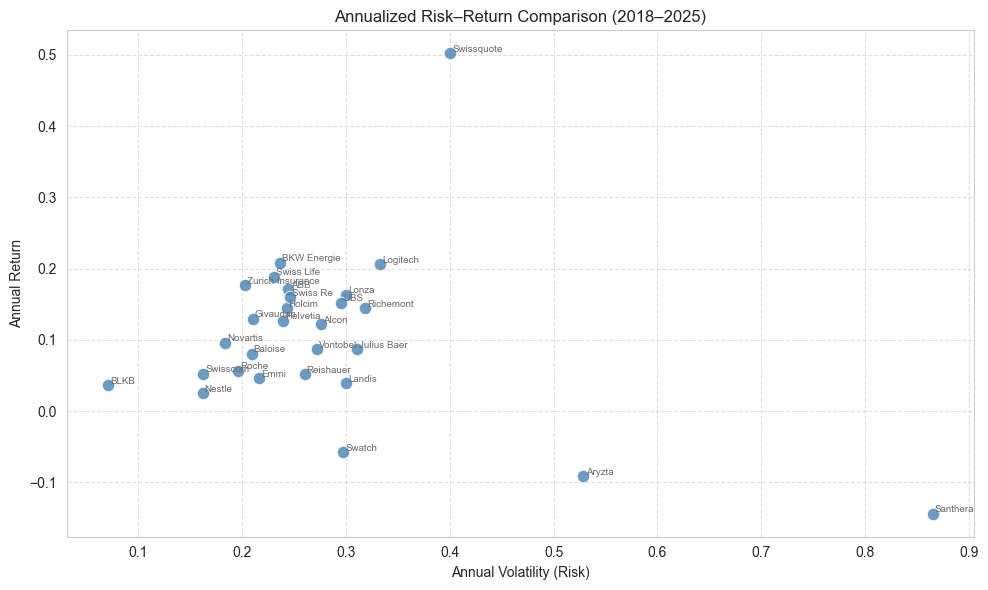

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_summary,
    x='annual_volatility',
    y='annual_return',
    s=80, color='steelblue', alpha=0.8
)

for i, row in df_summary.iterrows():
    plt.text(row['annual_volatility'] + 0.002,
             row['annual_return'] + 0.002,
             row['ticker'],
             fontsize=7, color='dimgray')

plt.title("Annualized Risk–Return Comparison (2018–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../../figures/market_exploration/annualized_risk_return_comparison.png")
plt.show()


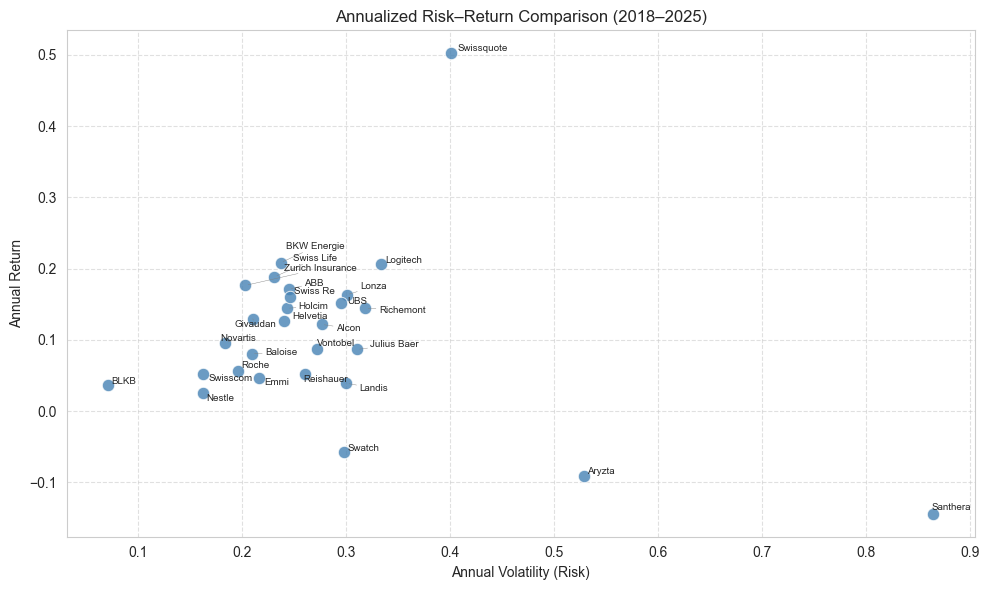

In [21]:
from adjustText import adjust_text

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_summary,
    x='annual_volatility',
    y='annual_return',
    s=80, color='steelblue', alpha=0.8
)

texts = []
for i, row in df_summary.iterrows():
    texts.append(
        plt.text(row['annual_volatility'],
                 row['annual_return'],
                 row['ticker'],
                 fontsize=7)
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.3))
plt.title("Annualized Risk–Return Comparison (2018–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../../figures/market_exploration/annualized_risk_return_comparison.png")
plt.show()


In [29]:

fig = px.scatter(
    df_summary,
    x='annual_volatility',
    y='annual_return',
    text='ticker',
    hover_name='ticker',
    title="Annualized Risk–Return Comparison (2018–2025)",
    color_discrete_sequence=['steelblue']
)
fig.update_traces(
    textposition='top center',
    textfont_size=8,
    marker=dict(size=12)
)

fig.update_layout(
    xaxis_title="Annual Volatility (Risk)",
    yaxis_title="Annual Return",
    template="simple_white"
)

fig.show()



## Top Companies by Risk-Adjusted Return

In [35]:
# Find top 5 companies with highest average annual return and lowest volatility (best risk-adjusted)

# Sort the summary DataFrame by risk-adjusted performance (annual return / annual volatility)
df_summary['risk_adjusted'] = df_summary['annual_return'] / df_summary['annual_volatility']

top5_companies = (
    df_summary
    .sort_values('risk_adjusted', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_companies.to_csv("../../tables/top5_companies_overall.csv", index=False)

print("Top 5 companies: highest return and least volatility (best risk-adjusted):")
display(top5_companies[['ticker', 'annual_return', 'annual_volatility', 'risk_adjusted']].round(4))


Top 5 companies: highest return and least volatility (best risk-adjusted):


ticker  annual_return  annual_volatility  risk_adjusted
0        Swissquote         0.5019             0.4006         1.2530
1       BKW Energie         0.2082             0.2370         0.8782
2  Zurich Insurance         0.1764             0.2032         0.8683
3        Swiss Life         0.1885             0.2312         0.8153
4               ABB         0.1711             0.2448         0.6991

In [33]:
# Identify top 5 companies per year by highest return AND lowest volatility

# First, calculate annual return and volatility for each ticker per year
market['year'] = pd.to_datetime(market['date']).dt.year

summary_by_year = (
    market.groupby(['ticker', 'year'])
    .agg(
        annual_return = ('return', lambda r: (1 + r).prod() - 1),
        annual_volatility = ('return', lambda r: r.std() * (252**0.5))
    )
    .reset_index()
)

# For each year, select top 5 companies with highest annual_return and lowest annual_volatility
# We'll use a combined score: annual_return divided by annual_volatility,
# and then pick the top 5 per year.

summary_by_year['risk_adjusted'] = summary_by_year['annual_return'] / summary_by_year['annual_volatility']

top5_by_year = (
    summary_by_year
    .sort_values(['year', 'risk_adjusted'], ascending=[True, False])
    .groupby('year')
    .head(5)
    .sort_values(['year', 'risk_adjusted'], ascending=[True, False])
)

# Display the results
for yr, grp in top5_by_year.groupby('year'):
    # Save results to ../../tables/
    output_dir = "../../tables/"

    results_df = (
        grp[['ticker', 'annual_return', 'annual_volatility', 'risk_adjusted']]
        .sort_values('risk_adjusted', ascending=False)
        .round({'annual_return': 4, 'annual_volatility': 4, 'risk_adjusted': 4})
        .reset_index(drop=True)
    )

    results_df.to_csv(f"{output_dir}top5_companies_{yr}.csv", index=False)
    print(f"Saved top 5 companies for {yr} to {output_dir}top5_companies_{yr}.csv")


Saved top 5 companies for 2018 to ../../tables/top5_companies_2018.csv
Saved top 5 companies for 2019 to ../../tables/top5_companies_2019.csv
Saved top 5 companies for 2020 to ../../tables/top5_companies_2020.csv
Saved top 5 companies for 2021 to ../../tables/top5_companies_2021.csv
Saved top 5 companies for 2022 to ../../tables/top5_companies_2022.csv
Saved top 5 companies for 2023 to ../../tables/top5_companies_2023.csv
Saved top 5 companies for 2024 to ../../tables/top5_companies_2024.csv


## Company-level Time Series Analysis


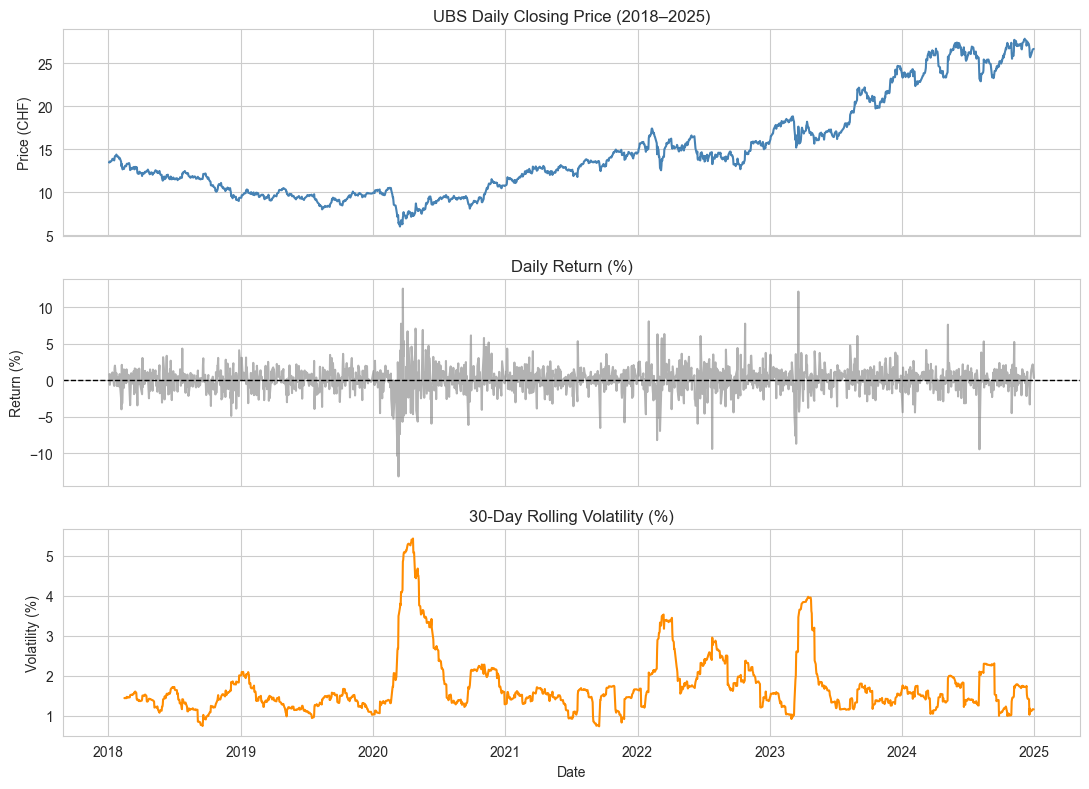

In [48]:
ticker = "UBS"


s = market[market["ticker"] == ticker].sort_values("date").set_index("date")

# compute metrics
daily_price = s["close"]
daily_return = s["return"] * 100                    # in %
rolling_vol = s["return"].rolling(30).std() * 100   # 30-day rolling volatility %

# three aligned subplots
fig, axes = plt.subplots(3, 1, figsize=(11,8), sharex=True)

# --- 1. Daily closing price
axes[0].plot(s.index, daily_price, color="steelblue")
axes[0].set_title(f"{ticker} Daily Closing Price (2018–2025)")
axes[0].set_ylabel("Price (CHF)")

# --- 2. Daily return (%)
axes[1].plot(s.index, daily_return, color="gray", alpha=0.6)
axes[1].axhline(0, ls="--", color="black", lw=1)
axes[1].set_title("Daily Return (%)")
axes[1].set_ylabel("Return (%)")

# --- 3. 30-day rolling volatility (%)
axes[2].plot(s.index, rolling_vol, color="darkorange")
axes[2].set_title("30-Day Rolling Volatility (%)")
axes[2].set_ylabel("Volatility (%)")
axes[2].set_xlabel("Date")

plt.tight_layout()
plt.show()

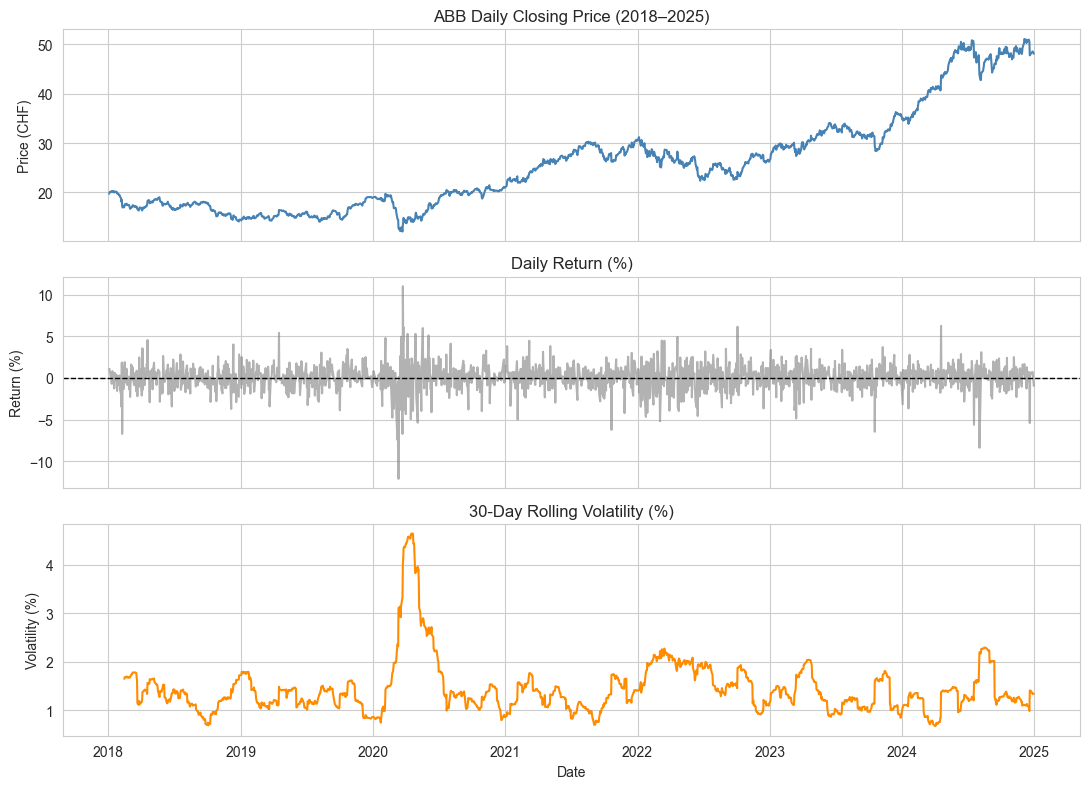

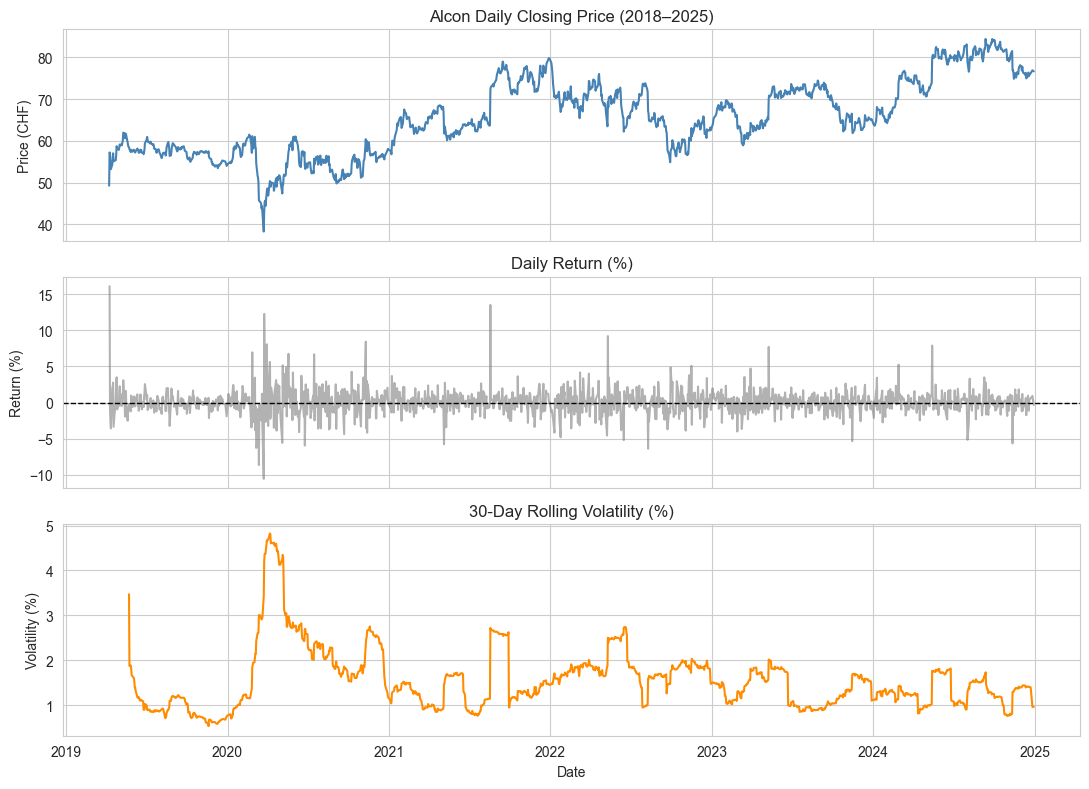

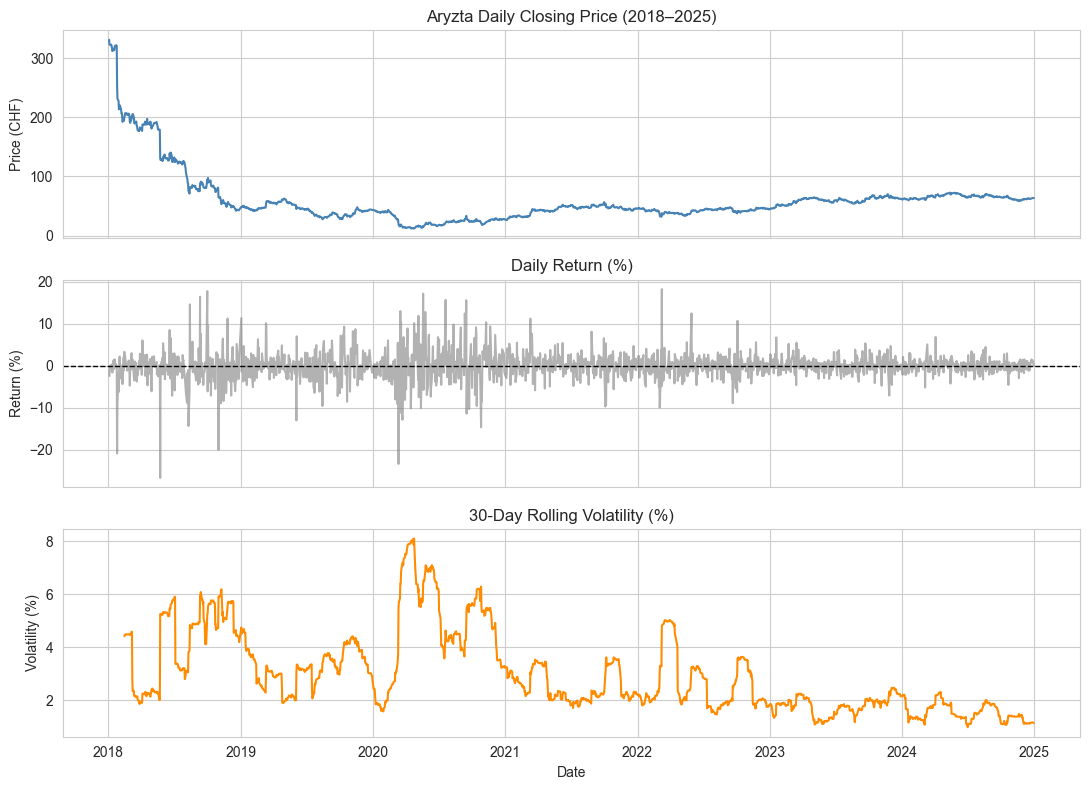

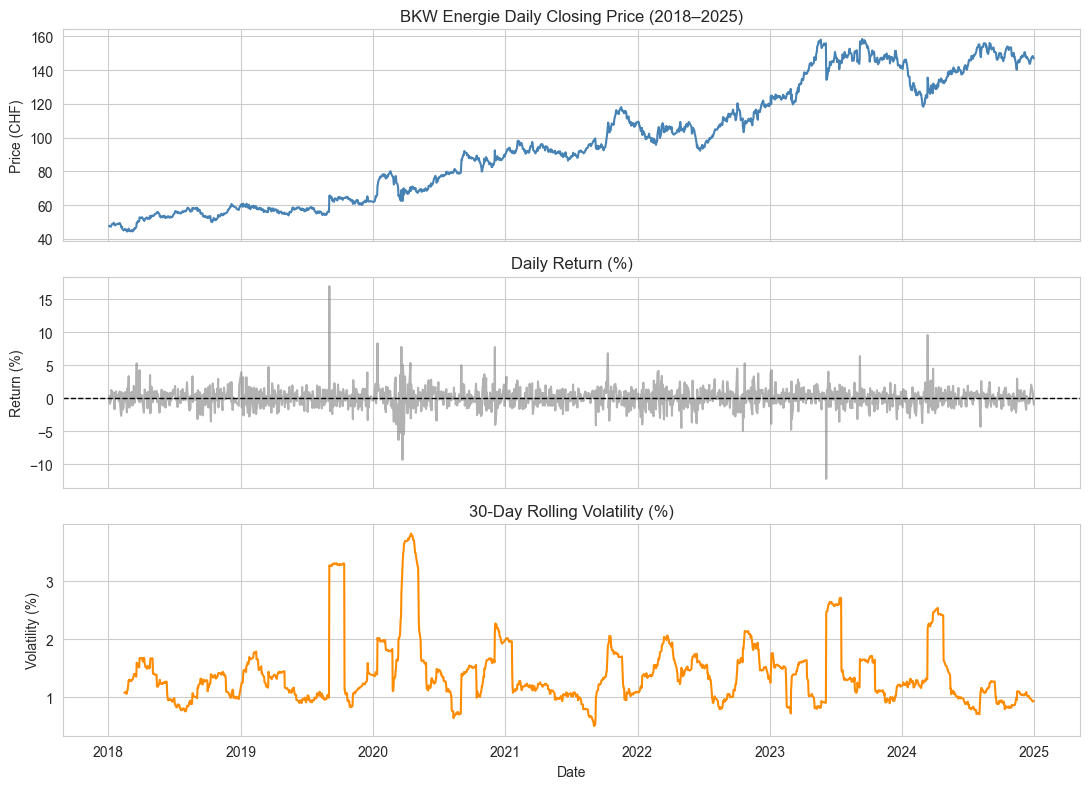

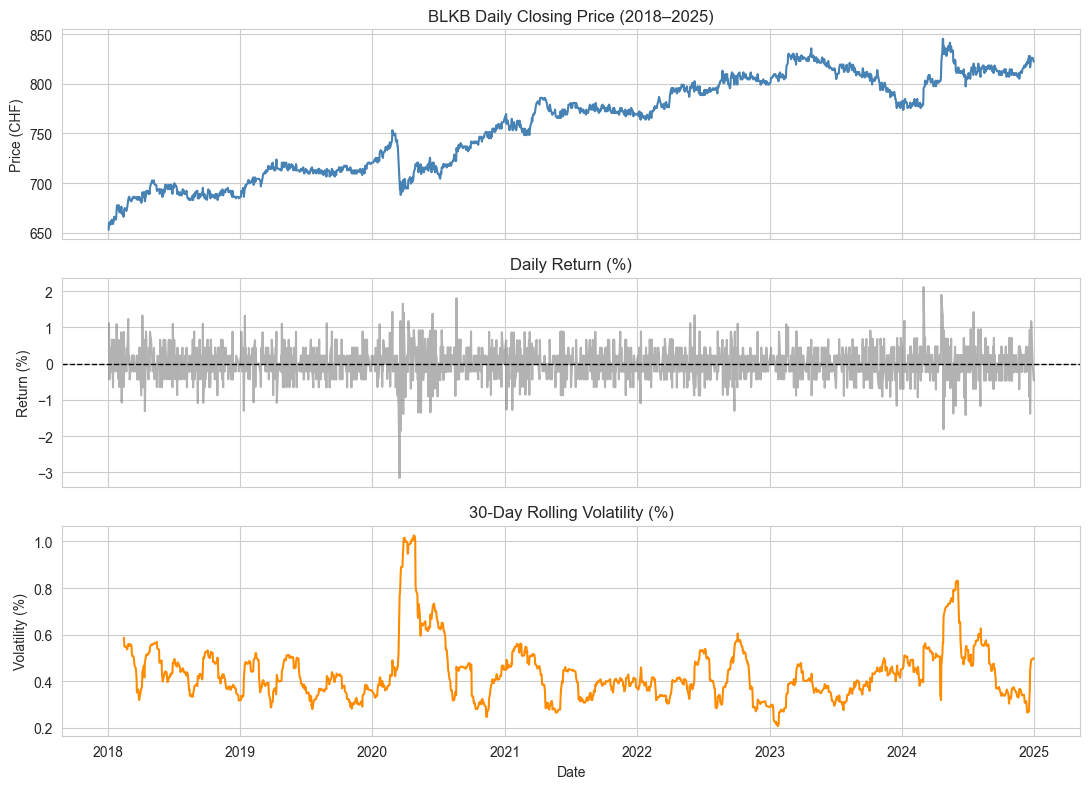

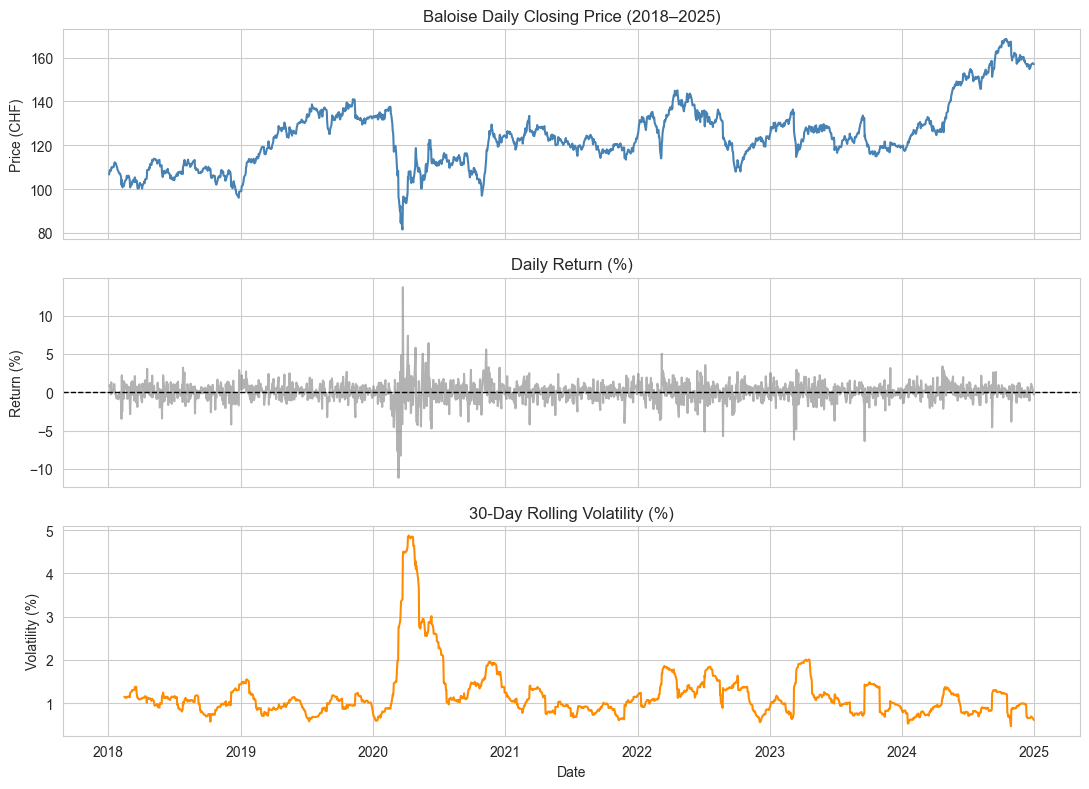

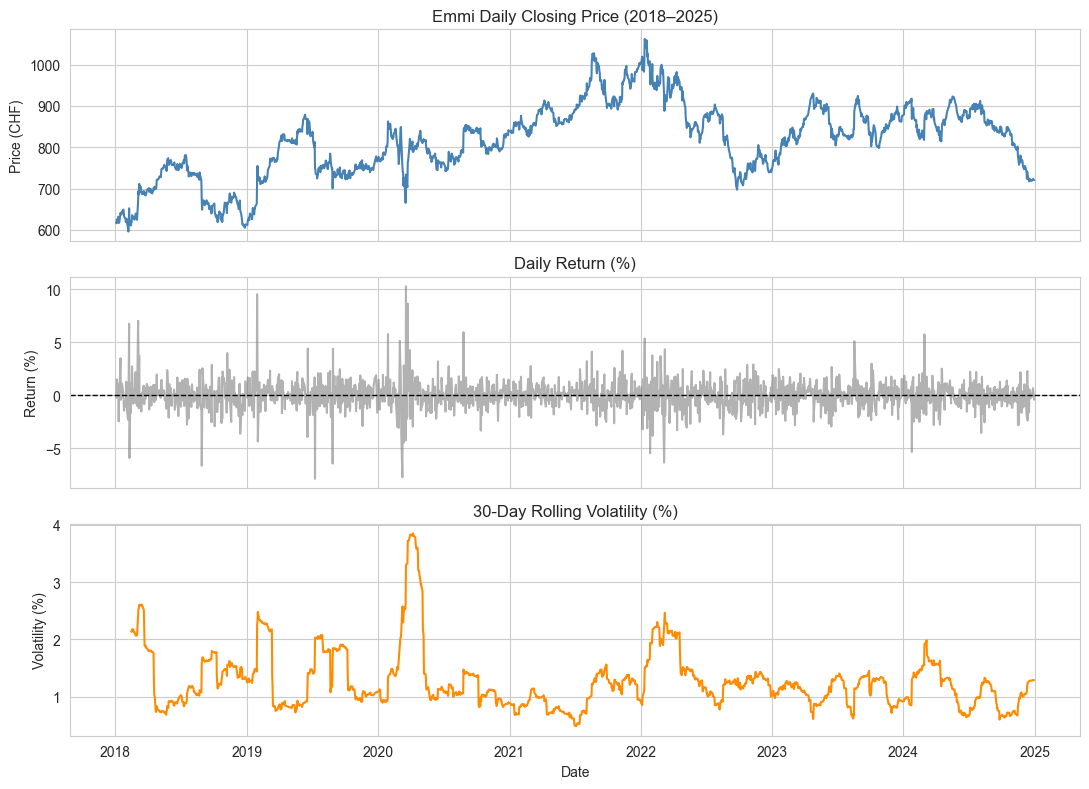

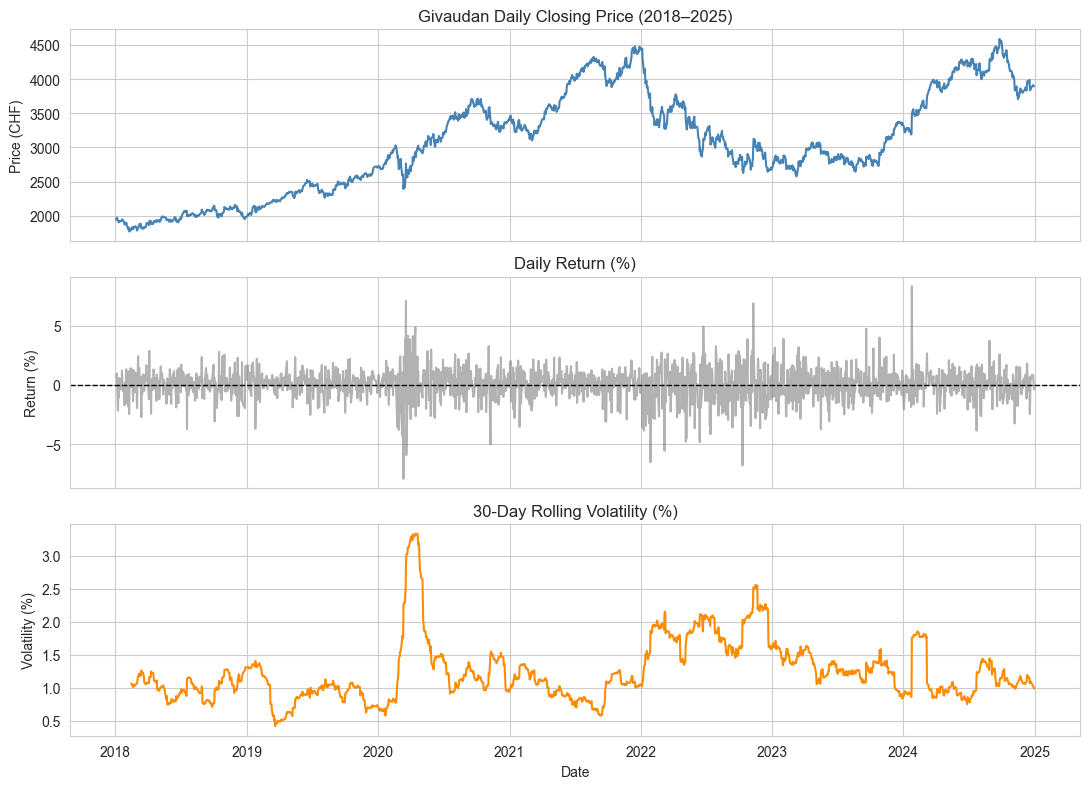

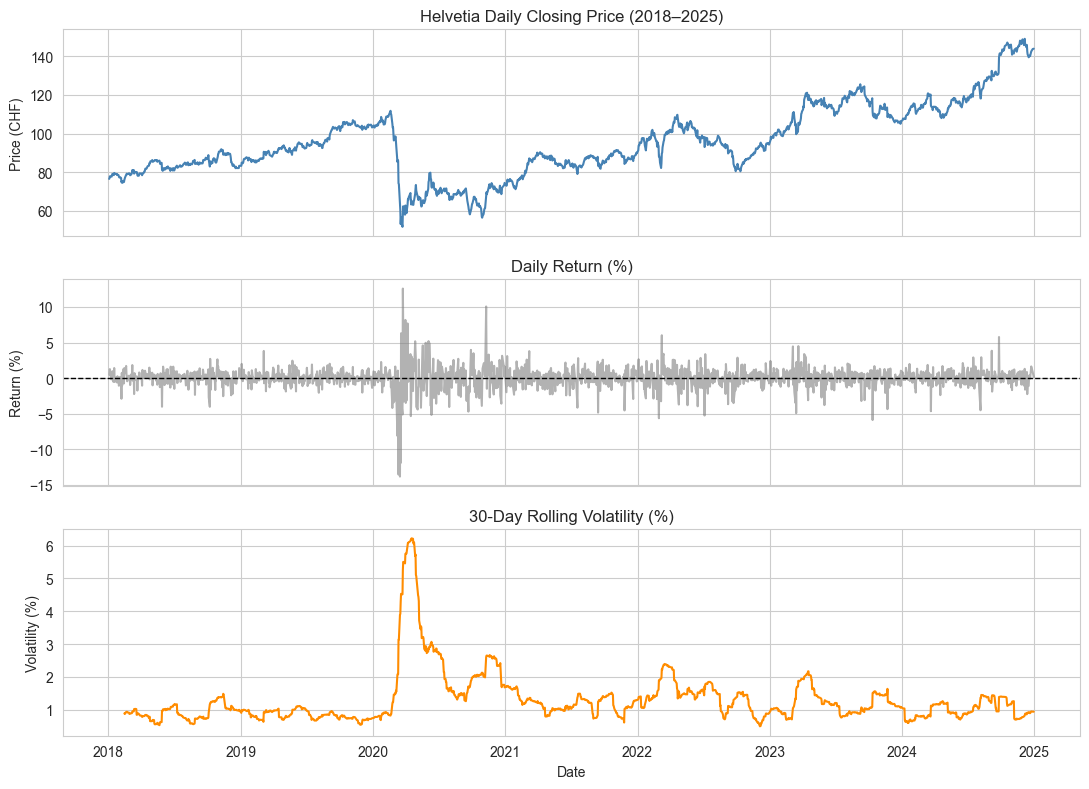

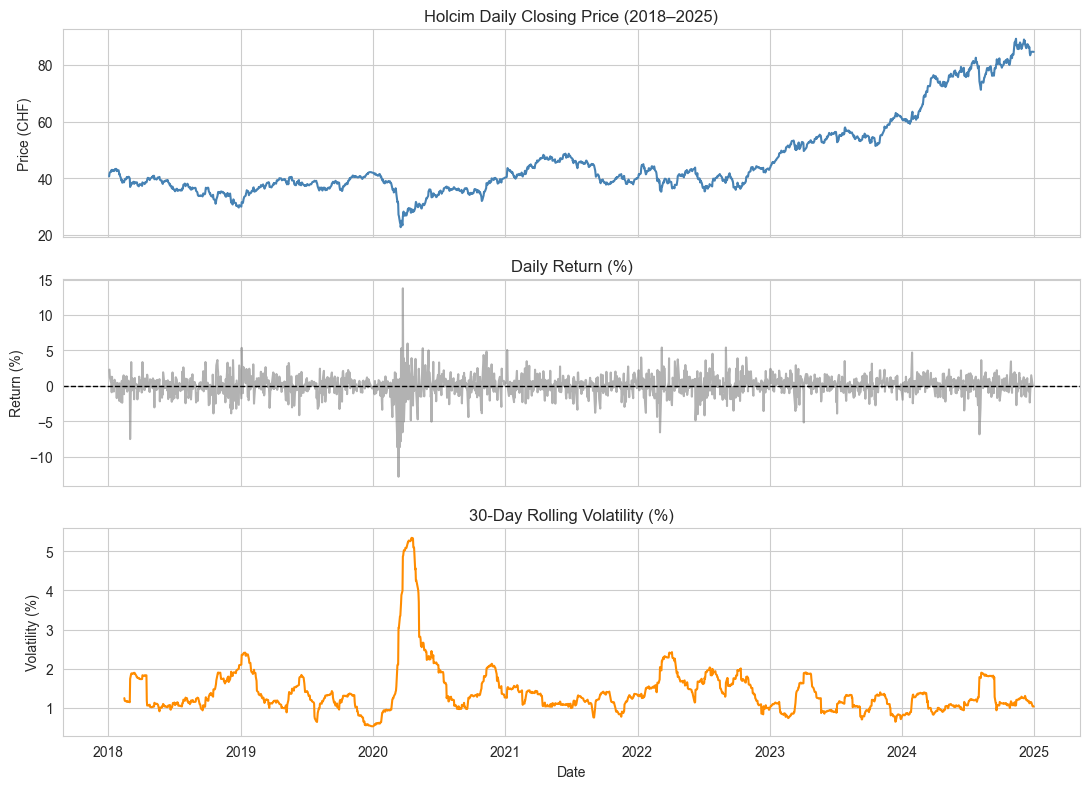

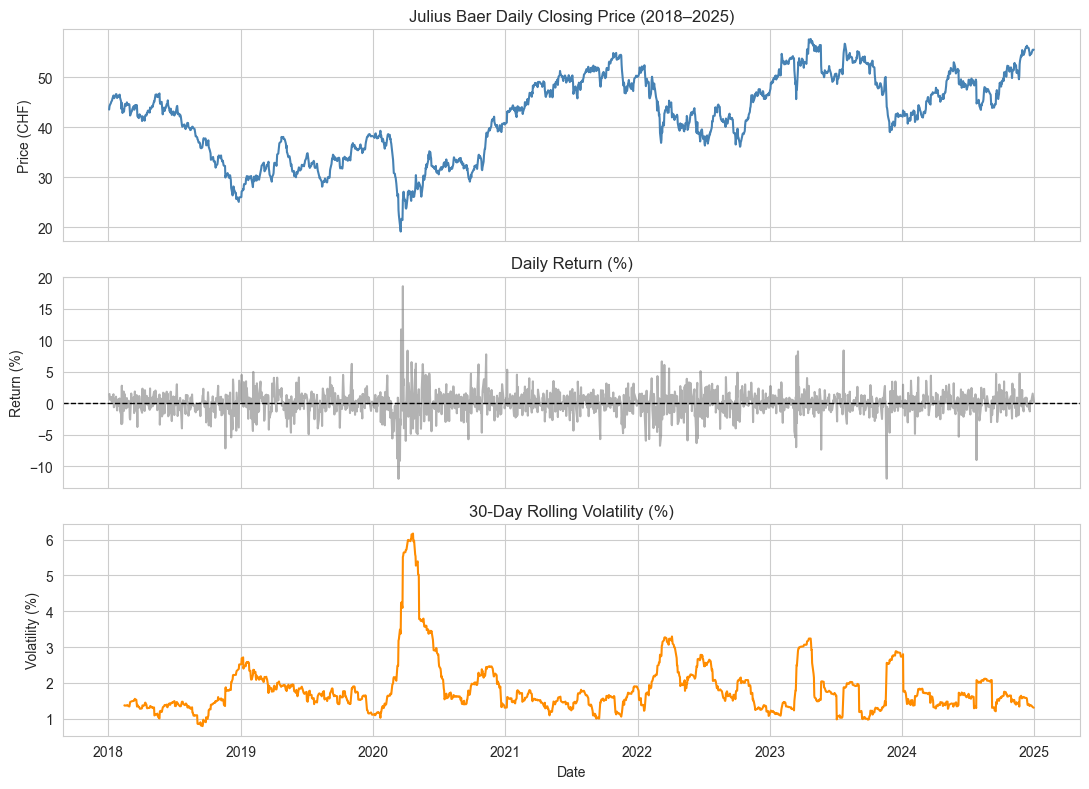

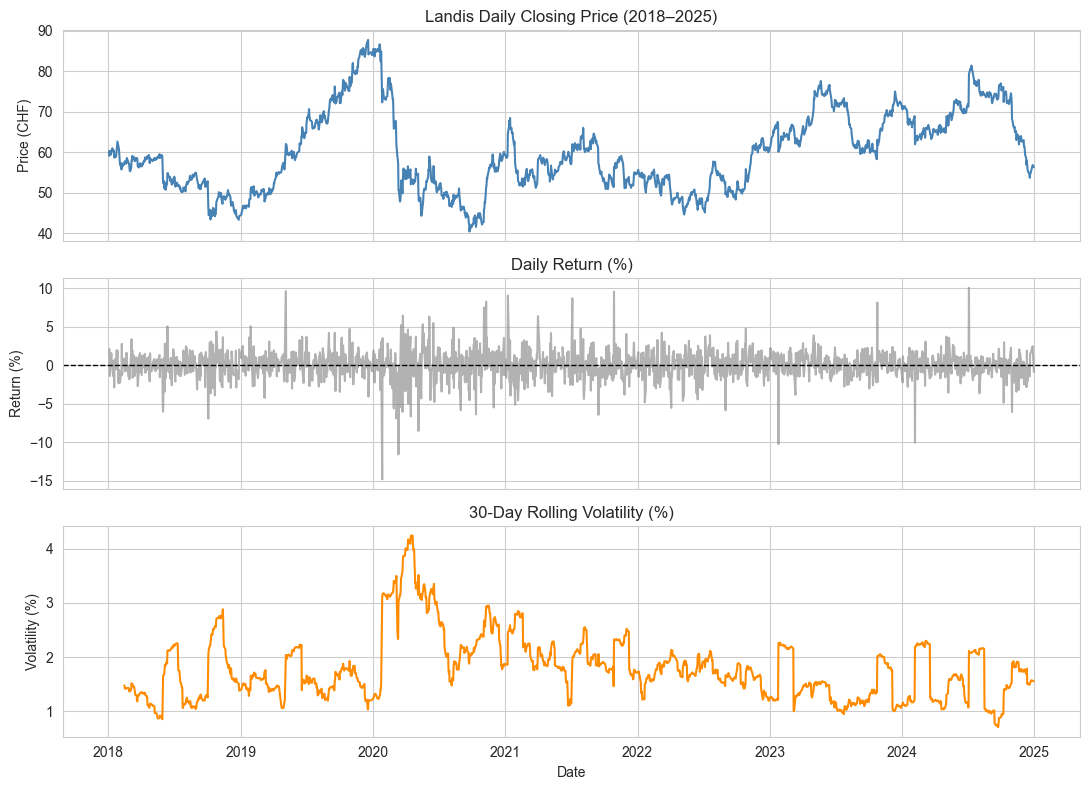

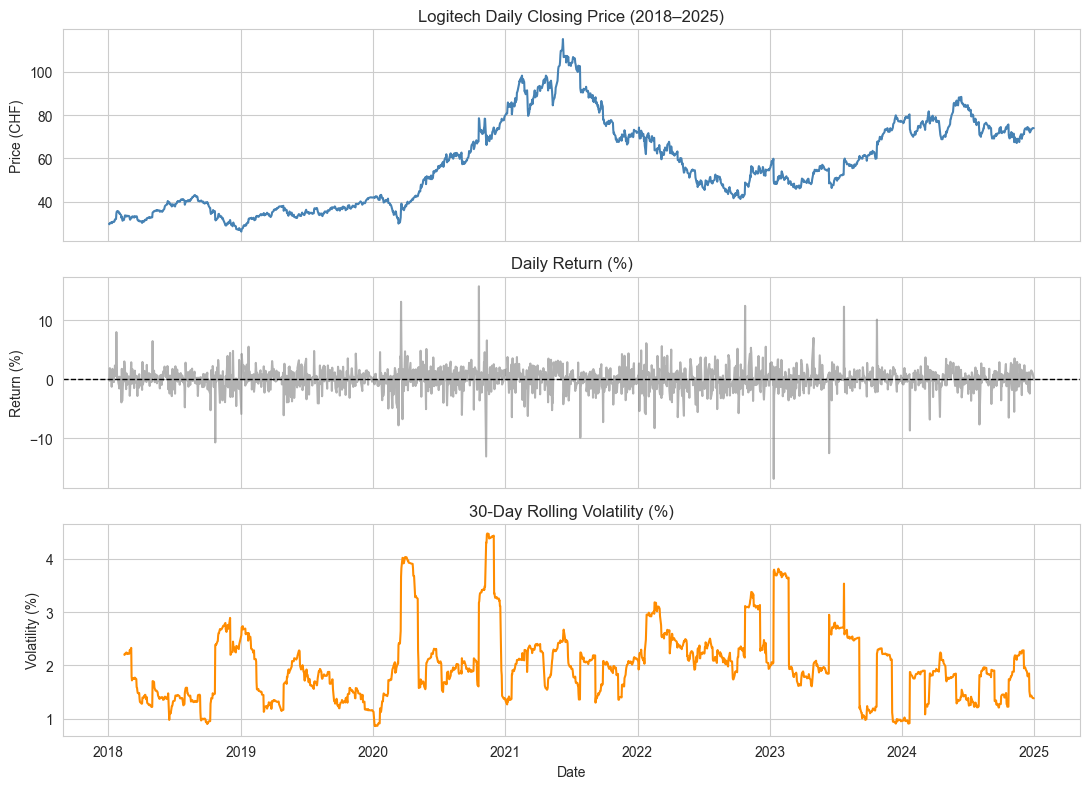

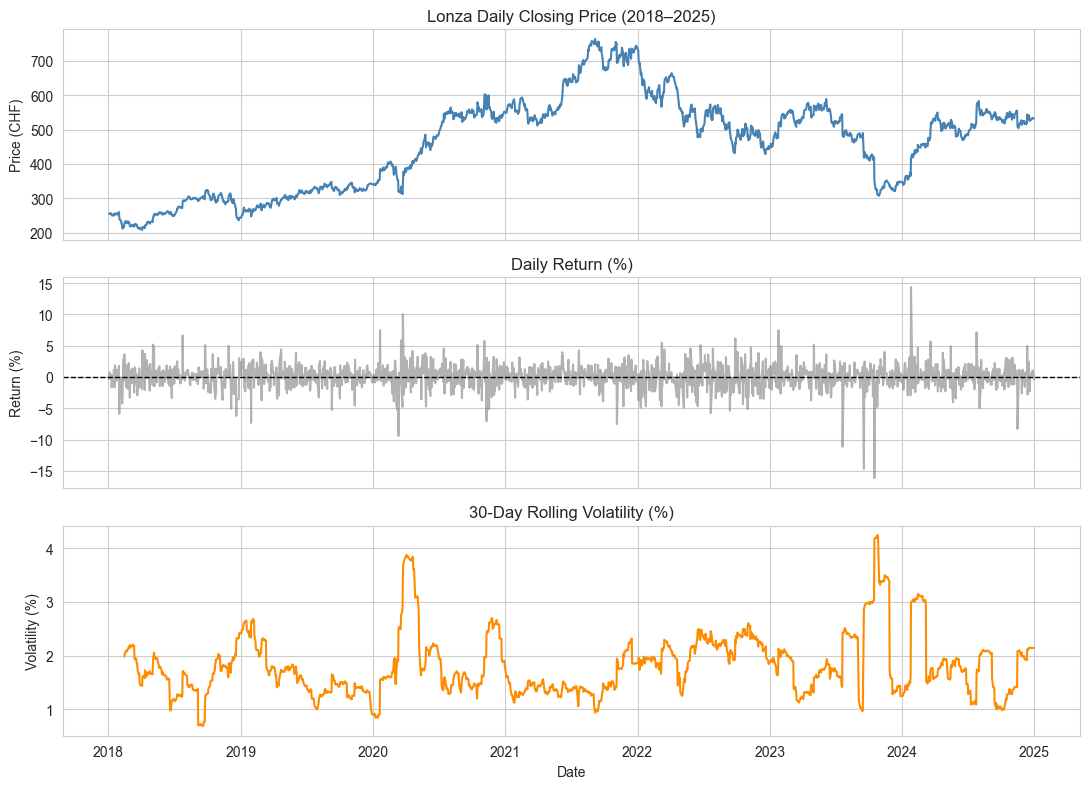

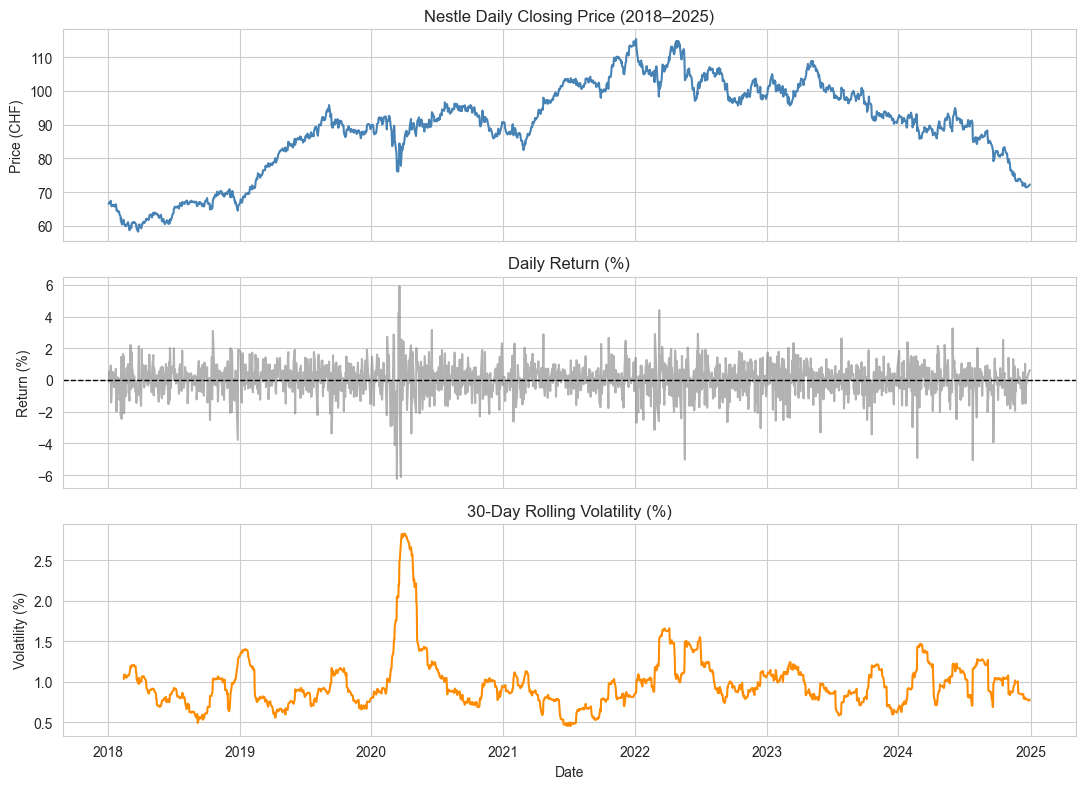

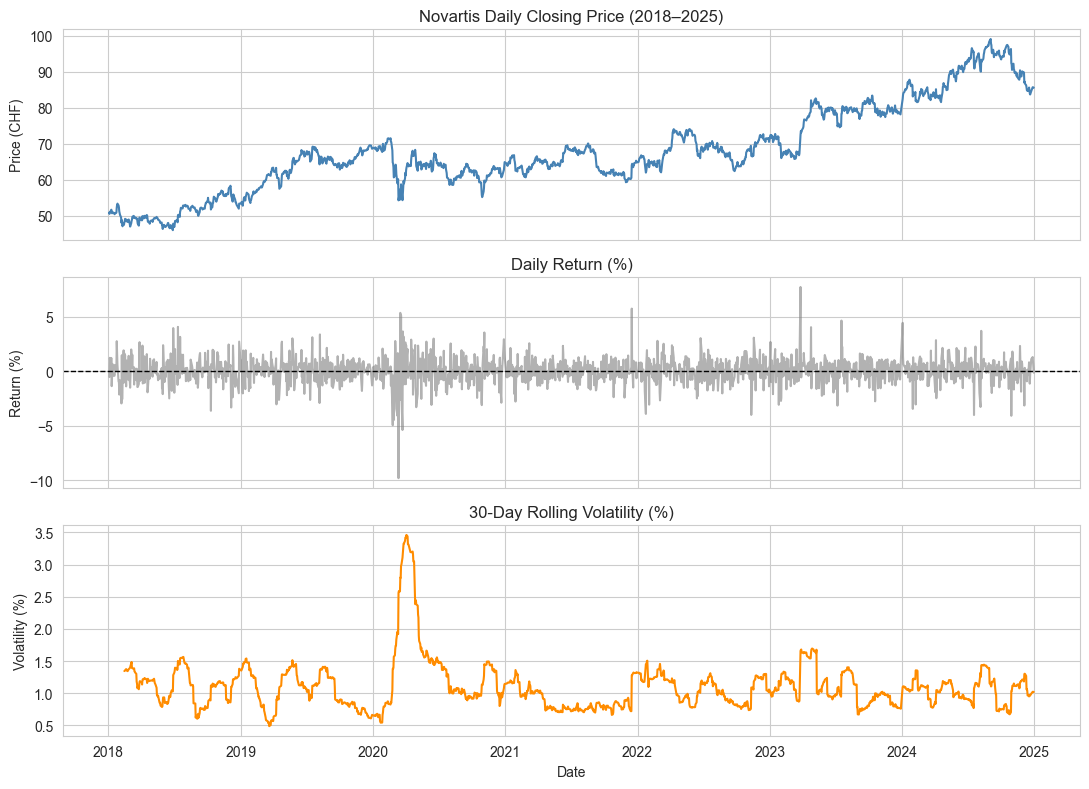

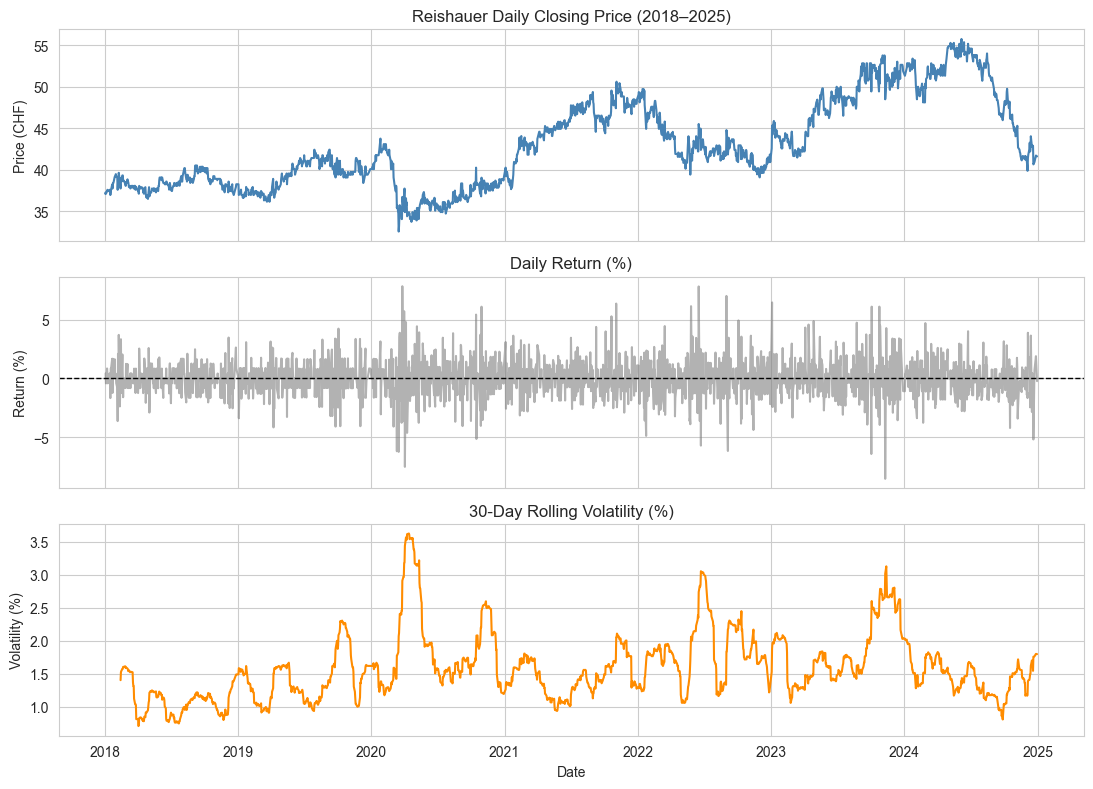

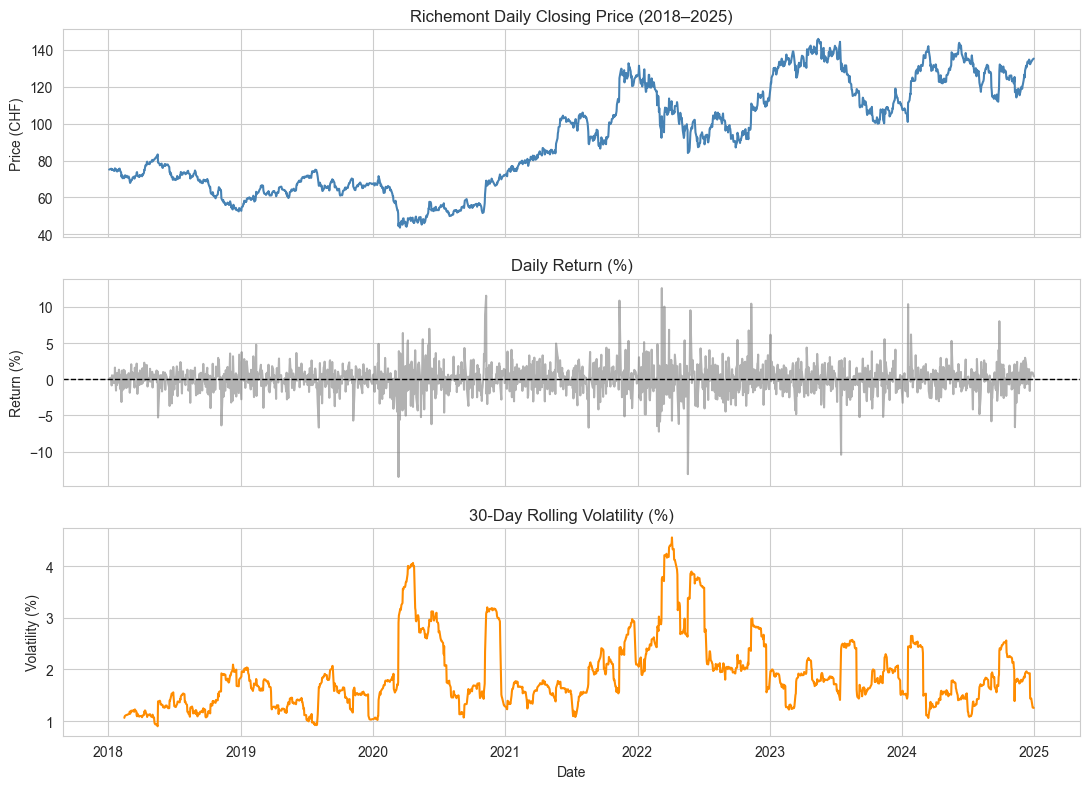

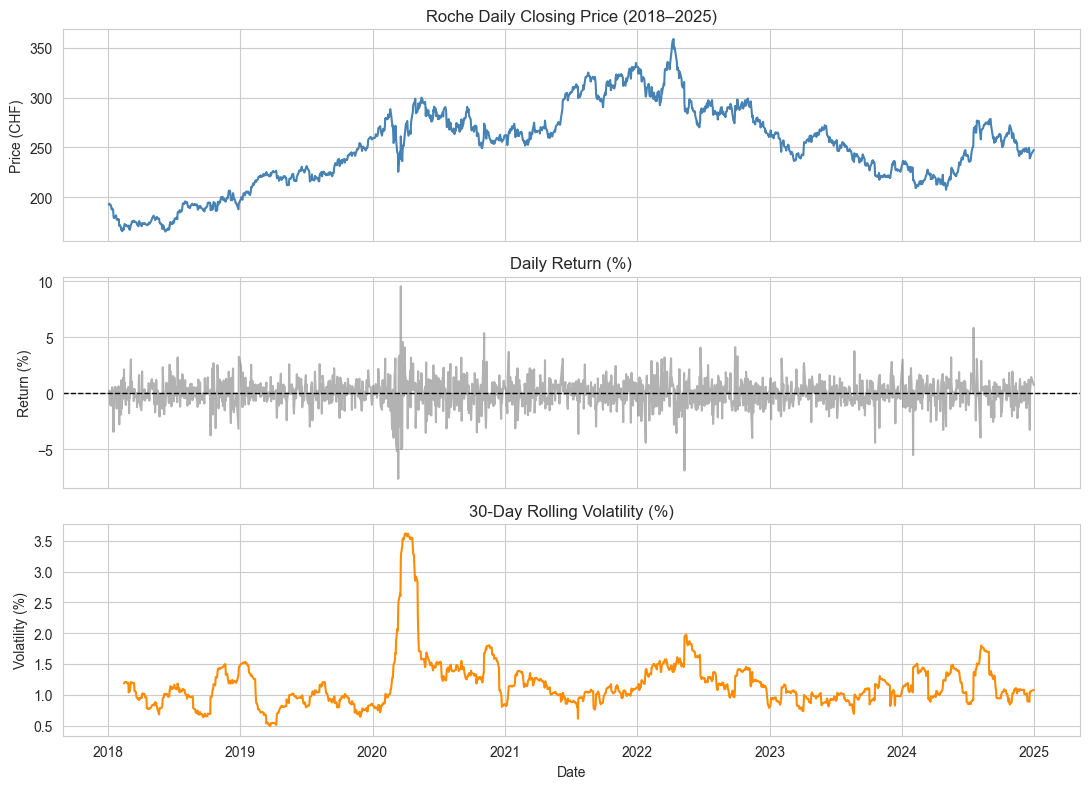

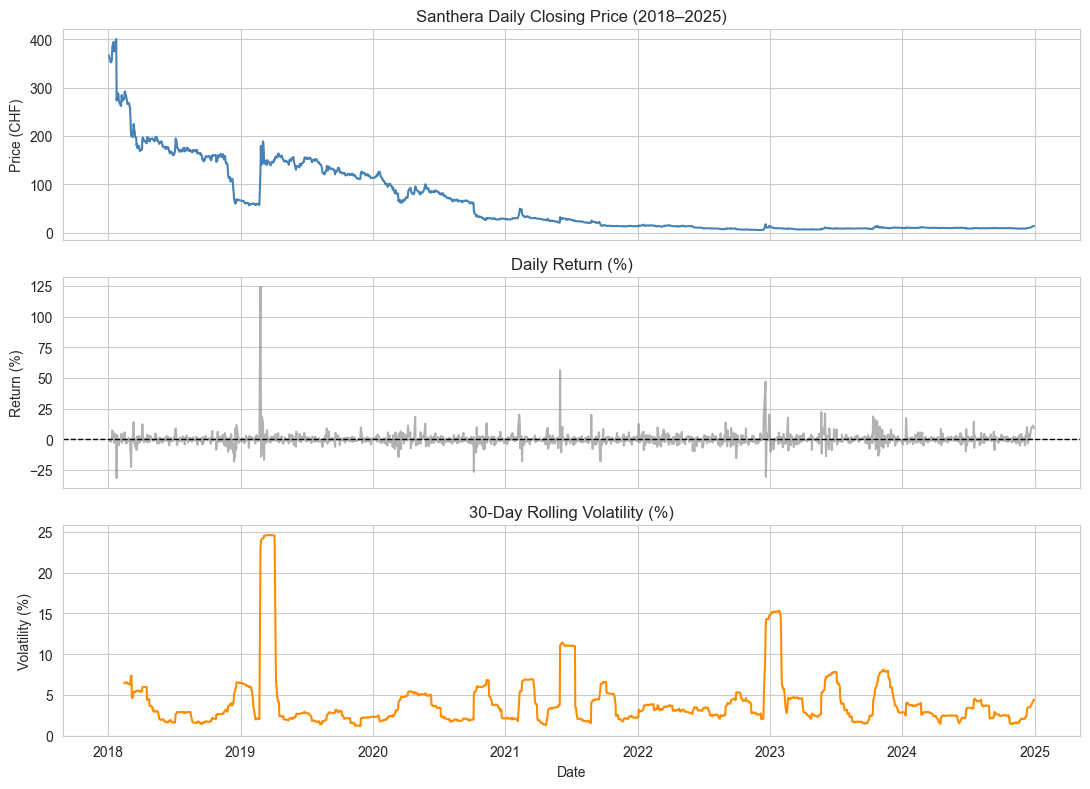

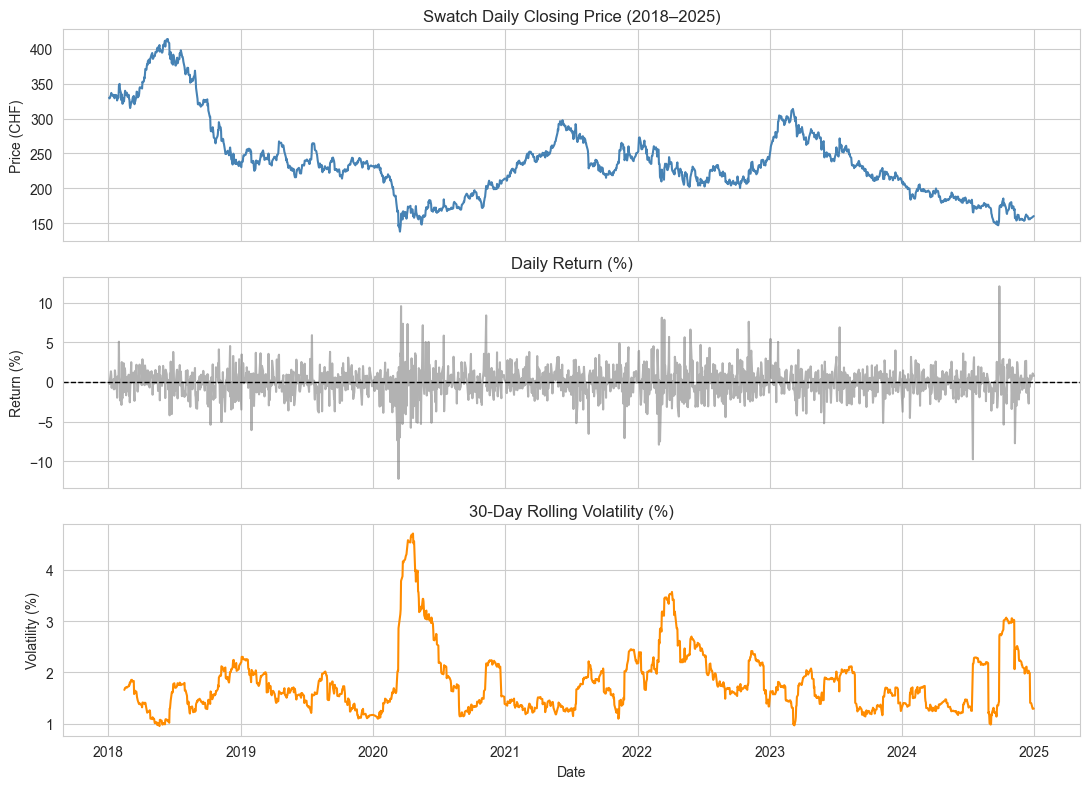

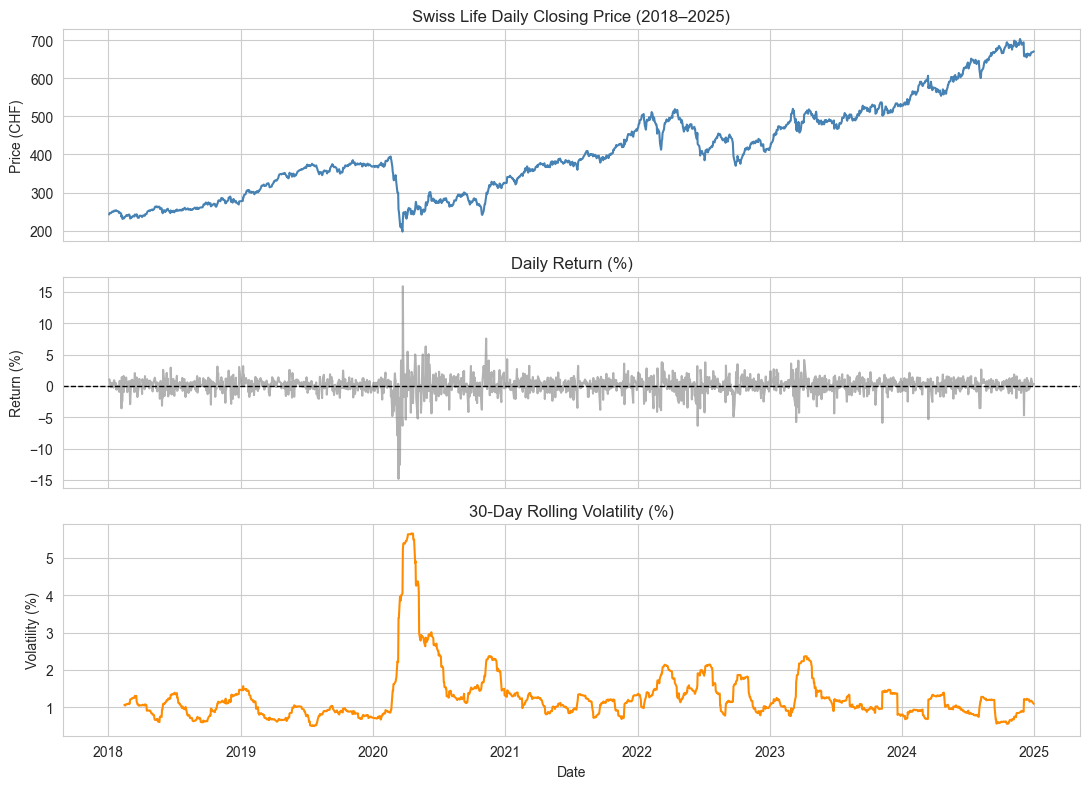

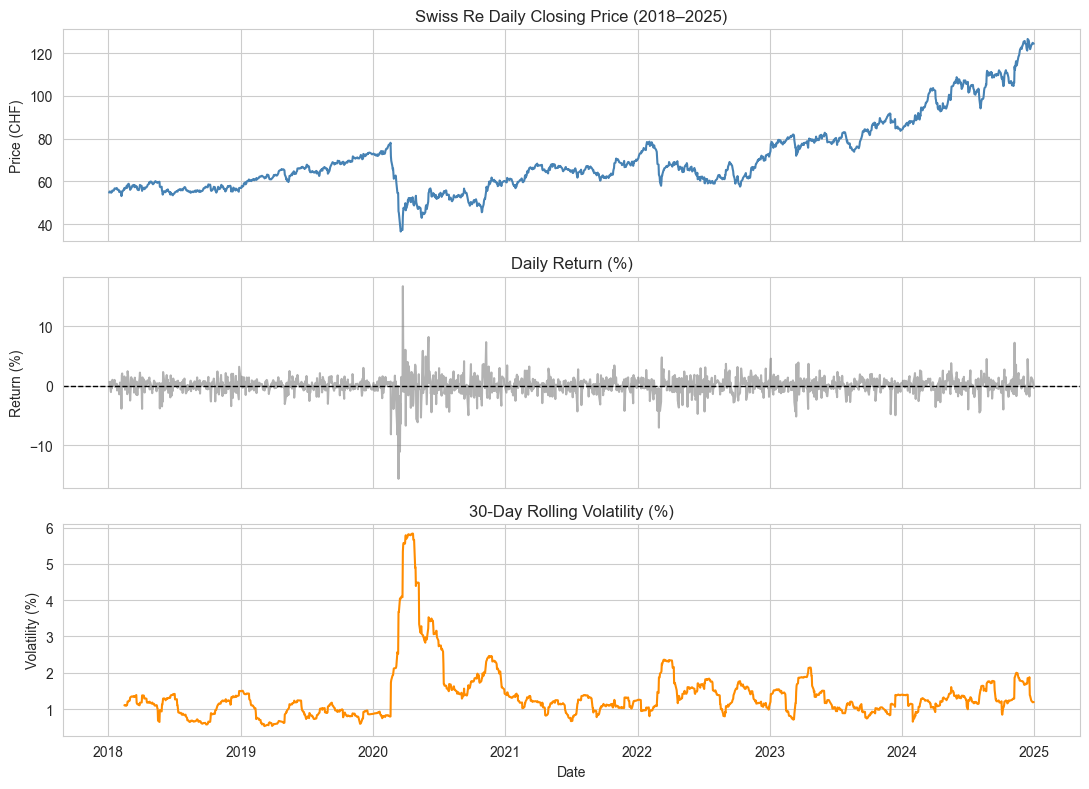

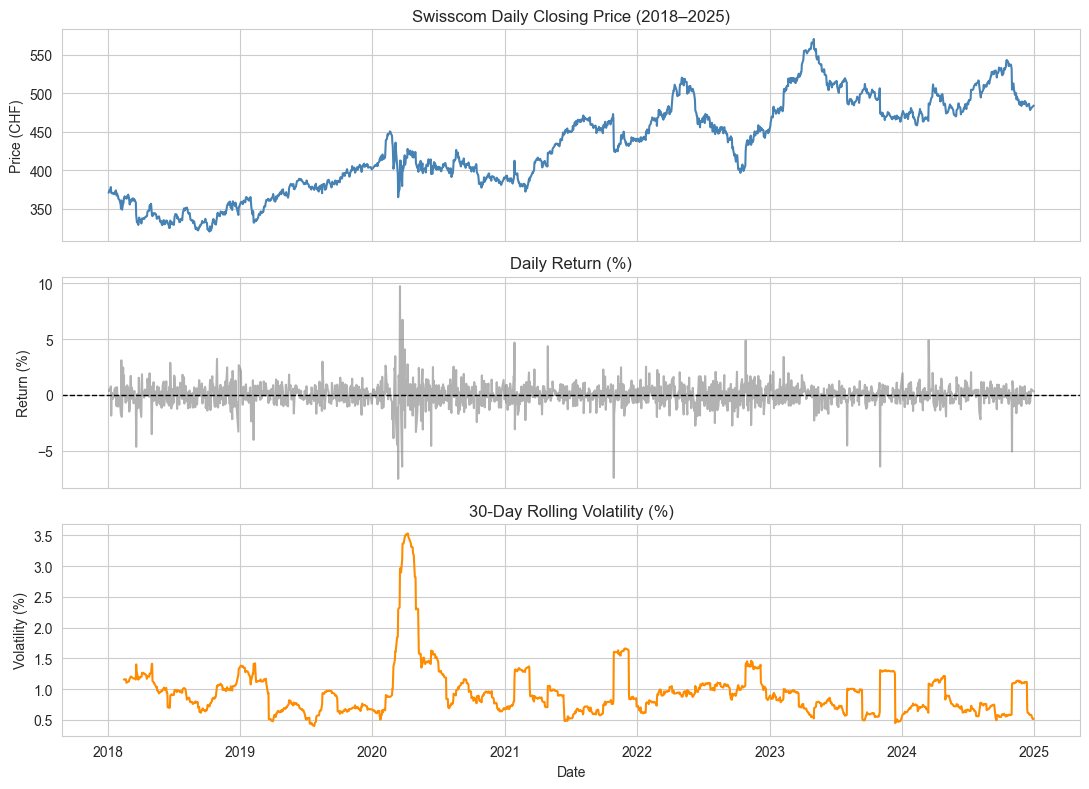

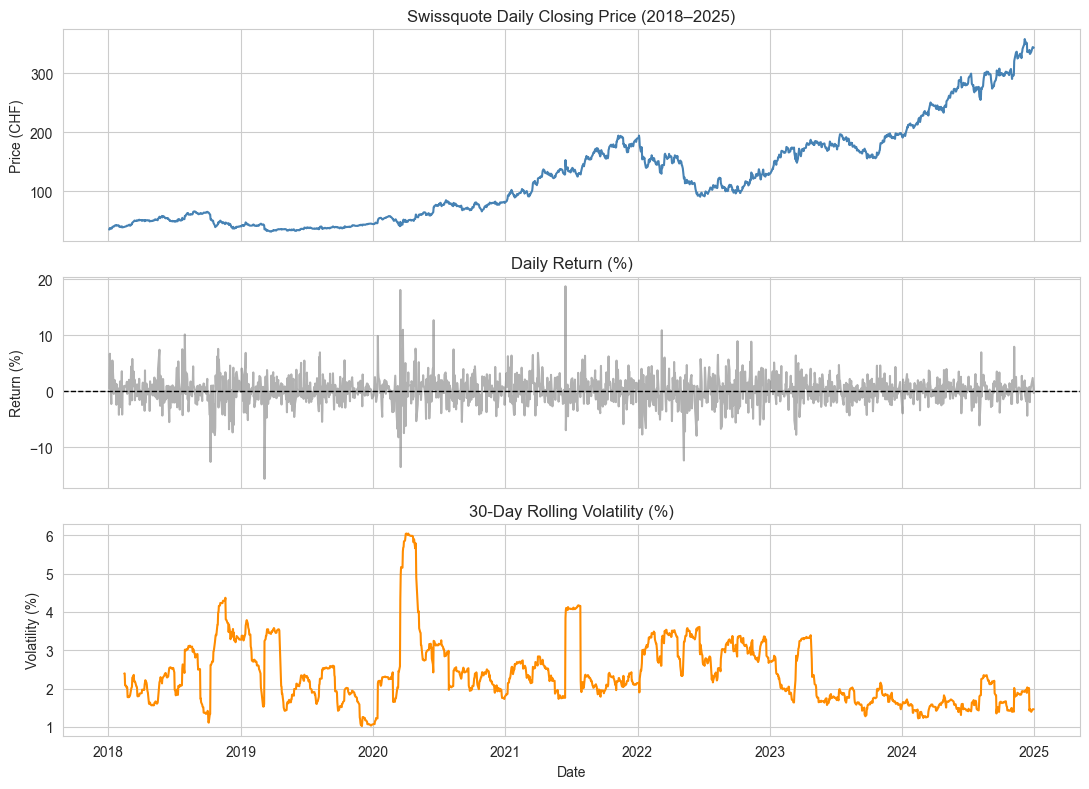

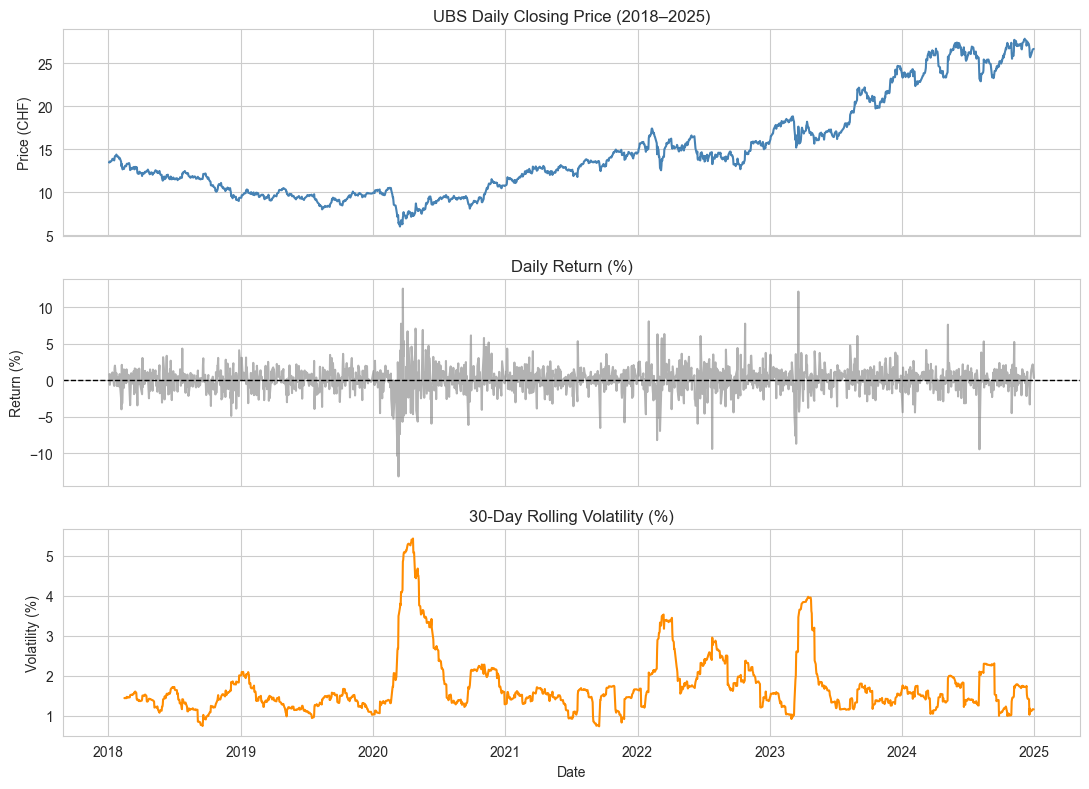

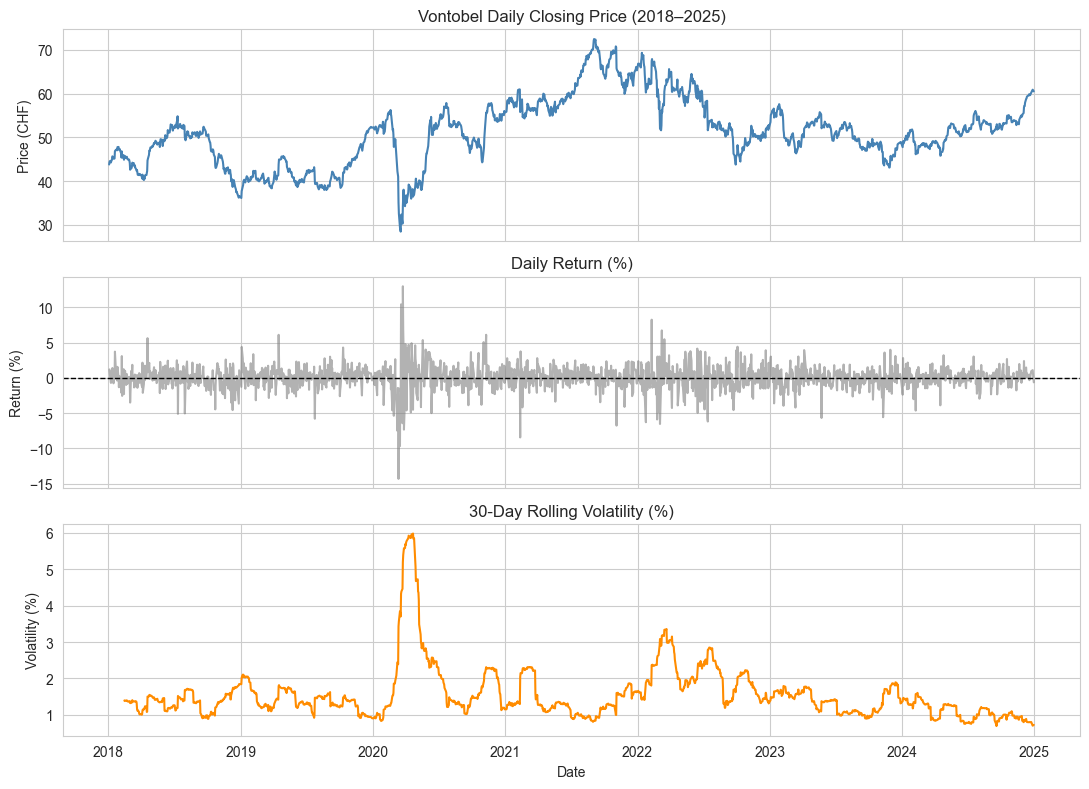

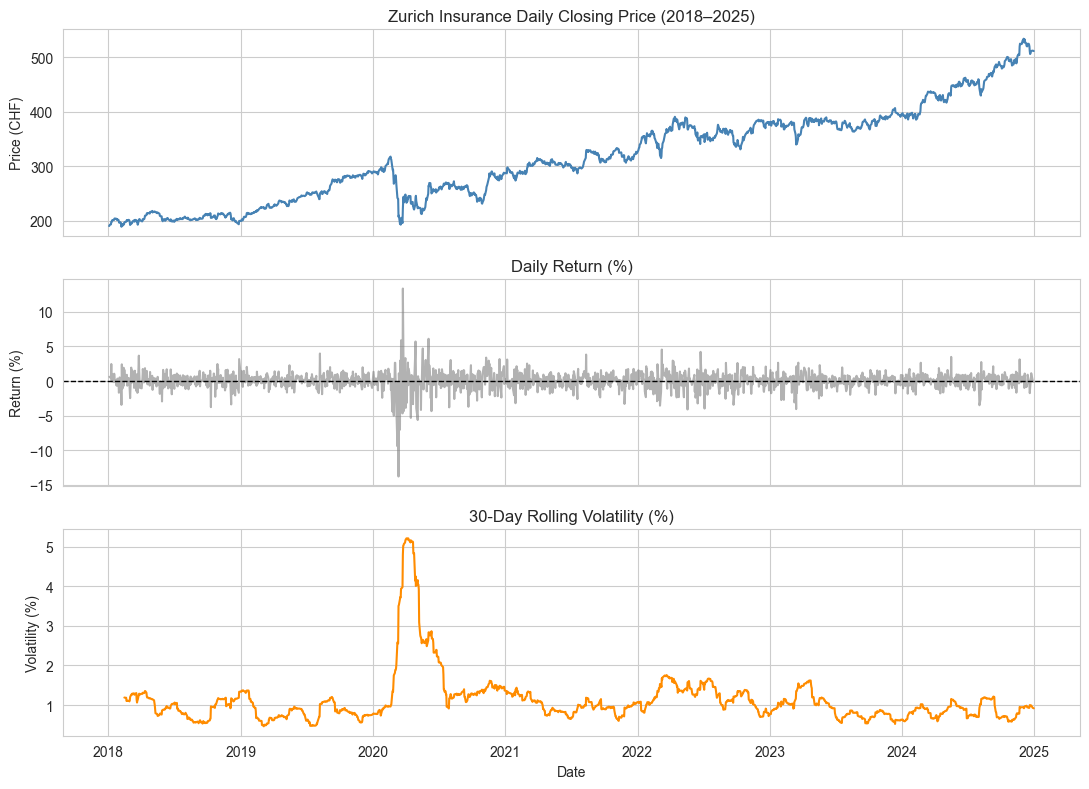

In [37]:
for ticker in market["ticker"].unique():
    s = market[market["ticker"] == ticker].sort_values("date").set_index("date")

    # compute metrics
    daily_price = s["close"]
    daily_return = s["return"] * 100                    # in %
    rolling_vol = s["return"].rolling(30).std() * 100   # 30-day rolling volatility %

    fig, axes = plt.subplots(3, 1, figsize=(11,8), sharex=True)

    # --- 1. Daily closing price
    axes[0].plot(s.index, daily_price, color="steelblue")
    axes[0].set_title(f"{ticker} Daily Closing Price (2018–2025)")
    axes[0].set_ylabel("Price (CHF)")

    # --- 2. Daily return (%)
    axes[1].plot(s.index, daily_return, color="gray", alpha=0.6)
    axes[1].axhline(0, ls="--", color="black", lw=1)
    axes[1].set_title("Daily Return (%)")
    axes[1].set_ylabel("Return (%)")

    # --- 3. 30-day rolling volatility (%)
    axes[2].plot(s.index, rolling_vol, color="darkorange")
    axes[2].set_title("30-Day Rolling Volatility (%)")
    axes[2].set_ylabel("Volatility (%)")
    axes[2].set_xlabel("Date")

    plt.tight_layout()
    fig.savefig(f"../../figures/market_exploration/{ticker}_metrics.png")
    plt.show()
    plt.close(fig)


## Dramatic Price Change Table


In [58]:
# Identify dates of dramatic changes for each ticker, including previous date
dramatic_changes = []

threshold = 0.05  # 5% as a threshold for dramatic change (adjust as desired)

for ticker in market["ticker"].unique():
    s = market[market["ticker"] == ticker].sort_values("date").reset_index(drop=True)
    s["prev_date"] = s["date"].shift(1)
    s["abs_return"] = s["return"].abs()
    # Find where abs_return is above threshold and grab previous date and return
    dramatic = s[s["abs_return"] > threshold][["date", "prev_date", "return"]]
    dramatic["ticker"] = ticker
    dramatic_changes.append(dramatic)

# After the loop, save the DataFrame as a table in the tables directory
import os
os.makedirs("../../tables", exist_ok=True)
dramatic_changes_df = pd.concat(dramatic_changes).sort_values(["ticker", "date"]).reset_index(drop=True)
dramatic_changes_df.to_csv("../../tables/dramatic_price_changes.csv", index=False)

dramatic_changes_df = pd.concat(dramatic_changes).sort_values(["ticker", "date"]).reset_index(drop=True)
# The table with columns: ticker, date, prev_date, return
dramatic_change_table = dramatic_changes_df[["ticker", "date", "prev_date", "return"]]



In [45]:
dramatic_change_table

ticker       date  prev_date    return
0                  ABB 2018-02-08 2018-02-07 -0.067125
1                  ABB 2019-04-17 2019-04-16  0.054202
2                  ABB 2020-03-09 2020-03-06 -0.074414
3                  ABB 2020-03-12 2020-03-11 -0.121161
4                  ABB 2020-03-23 2020-03-20 -0.067188
...                ...        ...        ...       ...
1003  Zurich Insurance 2020-03-25 2020-03-24  0.073242
1004  Zurich Insurance 2020-04-15 2020-04-14 -0.053275
1005  Zurich Insurance 2020-04-28 2020-04-27  0.057085
1006  Zurich Insurance 2020-05-04 2020-04-30 -0.056297
1007  Zurich Insurance 2020-06-03 2020-06-02  0.061017

[1008 rows x 4 columns]

In [57]:
# Let's investigate if dramatic changes in trading volume could indicate the presence of important news or events.
# We'll flag days where volume spikes significantly compared to recent history, and include the previous date for additional context.

volume_spike_changes = []

volume_threshold = 3  # 3x the 30-day rolling median volume as threshold

for ticker in market["ticker"].unique():
    s = market[market["ticker"] == ticker].sort_values("date").reset_index(drop=True)
    s["rolling_median_vol"] = s["volume"].rolling(window=30, min_periods=5).median()
    s["vol_spike"] = (s["volume"] / (s["rolling_median_vol"].replace(0, np.nan)))
    s["prev_date"] = s["date"].shift(1)
    spikes = s[s["vol_spike"] > volume_threshold][["ticker", "date", "prev_date", "volume", "rolling_median_vol", "vol_spike"]]
    spikes["ticker"] = ticker
    spikes = spikes[["ticker", "date", "prev_date", "volume", "rolling_median_vol", "vol_spike"]]
    volume_spike_changes.append(spikes)

# Concatenate all spikes into one DataFrame (do not save per-ticker CSVs)
volume_spike_df = pd.concat(volume_spike_changes).sort_values(["ticker", "date"]).reset_index(drop=True)

# Save the DataFrame as a CSV table in the tables directory
import os
os.makedirs("../../tables", exist_ok=True)
volume_spike_df.to_csv("../../tables/dramatic_volume_spikes.csv", index=False)

# Display some flagged days with dramatic volume spikes and their previous dates
volume_spike_df


ticker       date  prev_date      volume  rolling_median_vol  \
0                  ABB 2018-02-08 2018-02-07  17639303.0           5181034.0   
1                  ABB 2018-02-09 2018-02-08  16499267.0           5203719.5   
2                  ABB 2018-06-15 2018-06-14  18573352.0           5544902.5   
3                  ABB 2019-04-17 2019-04-16  25013746.0           4815935.5   
4                  ABB 2020-02-05 2020-02-04  22928654.0           7095493.5   
...                ...        ...        ...         ...                 ...   
1262  Zurich Insurance 2023-12-15 2023-12-14   1018100.0            282789.5   
1263  Zurich Insurance 2024-03-15 2024-03-14   1020368.0            261890.0   
1264  Zurich Insurance 2024-06-21 2024-06-20    999929.0            219980.0   
1265  Zurich Insurance 2024-09-20 2024-09-19    759041.0            234826.0   
1266  Zurich Insurance 2024-12-20 2024-12-19    975263.0            270249.5   

      vol_spike  
0      3.404591  
1      3.170668  
2      3.349626  
3      5.193954  
4      3.231439  
...         ...  
1262   3.600204  
1263   3.896170  
1264   4.545545  
1265   3.232355  
1266   3.608750  

[1267 rows x 6 columns]

In [54]:
# Find overlapping dates between dramatic price changes and dramatic volume spikes for each ticker
overlap = pd.merge(
    dramatic_change_table,
    volume_spike_df,
    on=["ticker", "date"],
    how="inner",
    suffixes=('_return', '_volume')
)

# Save overlap table to tables folder as CSV
import os
os.makedirs("../../tables", exist_ok=True)
overlap.to_csv("../../tables/dramatic_price_volume_overlap.csv", index=False)

overlap


ticker       date prev_date_return    return prev_date_volume  \
0                 ABB 2018-02-08       2018-02-07 -0.067125       2018-02-07   
1                 ABB 2019-04-17       2019-04-16  0.054202       2019-04-16   
2                 ABB 2020-03-09       2020-03-06 -0.074414       2020-03-06   
3                 ABB 2023-10-18       2023-10-17 -0.064605       2023-10-17   
4               Alcon 2020-02-26       2020-02-25  0.069519       2020-02-25   
..                ...        ...              ...       ...              ...   
330          Vontobel 2021-02-11       2021-02-10 -0.084525       2021-02-10   
331          Vontobel 2021-11-04       2021-11-03 -0.067748       2021-11-03   
332          Vontobel 2022-02-09       2022-02-08  0.082677       2022-02-08   
333  Zurich Insurance 2020-03-09       2020-03-06 -0.094181       2020-03-06   
334  Zurich Insurance 2020-03-12       2020-03-11 -0.137921       2020-03-11   

         volume  rolling_median_vol  vol_spike  
0    17639303.0           5181034.0   3.404591  
1    25013746.0           4815935.5   5.193954  
2    30450669.0           9015930.5   3.377429  
3     8385946.0           2559007.0   3.277031  
4     4992179.0           1162922.5   4.292787  
..          ...                 ...        ...  
330    196605.0             43176.0   4.553571  
331    124050.0             34713.0   3.573589  
332    110463.0             30086.5   3.671514  
333   2347172.0            637282.0   3.683098  
334   2550531.0            805640.5   3.165843  

[335 rows x 8 columns]